<a href="https://colab.research.google.com/github/sumanu9400/Machine_learning/blob/main/Salaries_data_using__ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#import data
data = pd.read_csv('/content/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


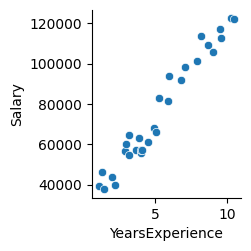

In [ ]:
sns.pairplot(y_vars = 'Salary', x_vars = 'YearsExperience' ,data = data)

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
X = data['YearsExperience']
y = data['Salary']

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.shape

(21,)

In [ ]:
X_test.shape

(9,)

In [ ]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           9.91e-14
Time:                        08:59:16   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387     

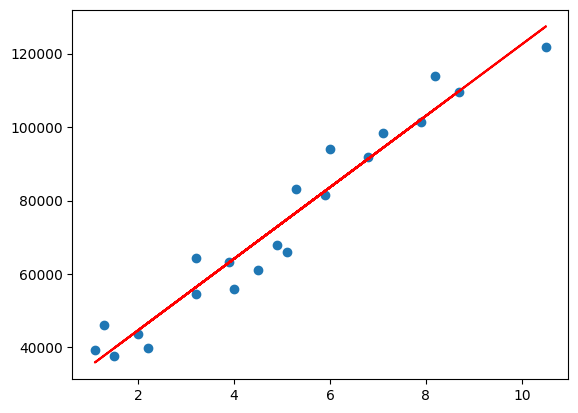

In [ ]:
# Let us show the line fitting:
plt.scatter(X_train,y_train)
plt.plot(X_train, 25200 + X_train * 9731.2038,'r')
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_sm)

In [ ]:
y_train_pred.head()

,0
17,76778.268129
22,102079.398108
11,64127.703139
4,46611.536230
29,127380.528088


In [ ]:
residual = (y_train - y_train_pred)

In [ ]:
residual.head()

,0
17,6309.731871
22,-777.398108
11,-8333.703139
4,-6720.536230
29,-5508.528088


<Axes: ylabel='Density'>

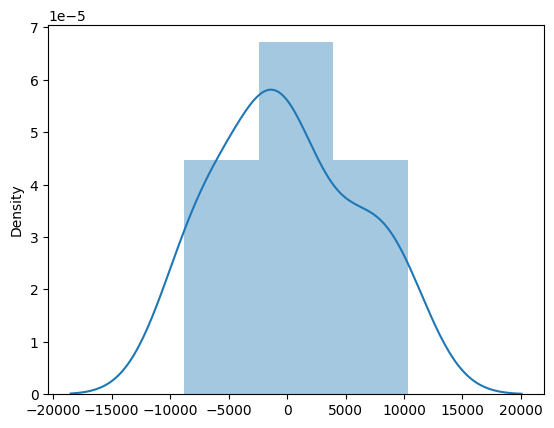

In [ ]:
sns.distplot(residual)

<Axes: xlabel='YearsExperience', ylabel='None'>

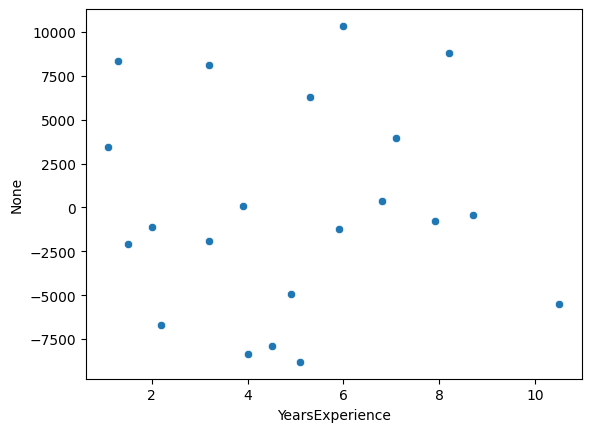

In [ ]:
sns.scatterplot(x=X_train, y=residual)

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_pred = model.predict(X_test_sm)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

5505.479002176121

In [ ]:
r2_score(y_test,y_pred)

0.9627668685473271

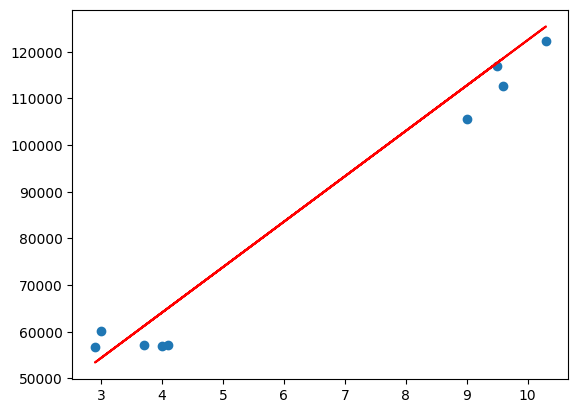

In [ ]:

# Let us show the line fitting:
plt.scatter(X_test,y_test)
plt.plot(X_test, 25200 + X_test * 9731.2038,'r')
plt.show()